<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

Признаки

RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты (1 - есть, 0 - нет)
IsActiveMember — активность клиента (1 - активный, 0 - нет)
EstimatedSalary — предполагаемая зарплата
Целевой признак

Exited — факт ухода клиента
Задачи 

Перед нами стоит задача классификации, а значит нам надо:

Подготовить и исследовать данные, включая баланс классов
Обучить разные модели и найти лучшую.
Провести финальное тестирование.
Общий вывод

## Подготовка данных

In [1]:
#импорт
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# прочитаем данные файла
df = pd.read_csv('/datasets/Churn.csv')

# посмотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


**Вывод по данным**
- Пустые значения в количестве недвижимости у клиента Tenure (скорее всего, означает ее отсутствие)
- Также Tenure стоит привести к целочисленному типу
- Столбцы RowNumber и CustomerId нам точно не понадобятся. Фамилия тоже, хотя на будущее можно было бы попробовать поискать любопытные взаимосвязи (в духе, если фамилия типично европейская, то...). Сейчас просто удалим.
- Количественные признаки Gender и Geography нужно будет преобразовать к числовым значениям

In [4]:
# Удалим лишние признаки
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

Дополнительно исследовал Tenure, чтобы понять, корректно ли их заполнять нулями. Для этого
- Посмотрел среднее значение признаков по выборке (только пустые значения) и по всем данным. Т.е. гипотеза, что эти люди меньше зарабатывают или отличаются по другим параметрам, не подтвердилась
- Построил матрицу корреляции. Опять же, самая высокая корреляция с HasCrCard. С остальными признаками корреляция минимальна.

Таким образом, мы не можем однозначно утверждать, что пропущенные значения в реальности нули, однако и каких-то дополнительных якорей, чтобы заполнить их приближено к реальности у нас нет.

В связи с этим, в дальнейшем попробую заполнить нулями. Если результаты не будут устраивать, попробую удалить значения из выборки.

In [5]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [6]:
df.Tenure.isnull().sum()

909

In [7]:
df['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

**Меньше 10% можно и удалить**

**Заменю пропуски значениями от 1 до 10, чтобы не так сильно испортить распределение**

In [8]:
df = df.dropna(subset=['Tenure'])

In [9]:
df['Tenure']

0        2.0
1        1.0
2        8.0
3        1.0
4        2.0
        ... 
9994     2.0
9995     5.0
9996    10.0
9997     7.0
9998     3.0
Name: Tenure, Length: 9091, dtype: float64

In [10]:
df.Tenure.isnull().sum()

0

**Разберемся с категориальными признаками**

In [11]:
# Проверим, что полов у нас всего два (на всякий случай)
df['Gender'].value_counts()

Male      4974
Female    4117
Name: Gender, dtype: int64

In [12]:
# Посмотрим сколько у нас стран
df['Geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

In [13]:
# Т.к. полов всего два, достаточно заменить признак на 1-0,
# но в целом OHE при удалении столбца даст тот же эффект, поэтому используем прямое кодирование
# также малое количество стран позволяет им обойтись
# к тому же OHE подойдет для всех трех моделей, поэтому остановимся на нем

df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


In [14]:

# Мы имеем явно большой масштаб числовых признаков, стандартизируем их

# Поначалу пробовал делать сразу fit_transform на весь набор, но на консультации сказали, что так лучше не делать
# поэтому сперва разобьем нашу выборку на тестовую и валидационную

# Для начала отделим целевой признак

target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

# Определим random_state для всего проекта
RANDOM_STATE = 12345

# поскольку спрятанной тестовой выборки нет, поделим наш датасет на три в пропорции 60-20-20
# сначала отделим набор на котором будем тренировать
features_train, df_valid_ant_test_features, target_train, df_valid_ant_test_target = train_test_split(
    features, target, test_size=0.4, random_state=RANDOM_STATE)

# теперь разделим тестовую выборку от валидационной
features_valid, features_test, target_valid, target_test = train_test_split(
    df_valid_ant_test_features, df_valid_ant_test_target, test_size=0.5, random_state=RANDOM_STATE)

del df_valid_ant_test_features, df_valid_ant_test_target

# Проверим, что получилось
print('Target test count = {}, Varget test count = {}, Train test count = {}'.format(target_test.count(), target_valid.count(), target_train.count()))

Target test count = 1819, Varget test count = 1818, Train test count = 5454


In [15]:
# Стандартизируем признаки
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler.fit(features_train[numeric])

pd.set_option('mode.chained_assignment', None)
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# посмотрим на тренировочной выборке что получилось
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,0,0,1
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0,0,1
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4938,1.283988,-0.474624,1.730036,0.813031,-0.908179,0,0,-1.092767,1,0,1
4529,0.158652,0.466548,1.041028,1.071609,-0.908179,1,1,0.260842,0,0,0
3866,-1.049276,-0.945210,0.352020,0.449165,-0.908179,1,1,-1.086965,0,0,0
2414,-0.956359,1.219485,1.385532,-1.237830,-0.908179,1,0,1.288527,0,0,0


**Вывод**
- Мы изучили данные, заполнили пропуски, привели типы к соответствующим значениям
- Удалили признаки, которые нам вряд ли бы чем-то помогли
- Посредством One-Hot Encoding преобразовали категориальные признаки в числовые
- Привели числовые признаки к одному масштабу

По итогу, мы подготовили данные для дальнейшего исследования

## Исследование задачи

<AxesSubplot:title={'center':'Распределение целевого признака'}, xlabel='Значение признака', ylabel='Количество записей с соответствующим значением'>

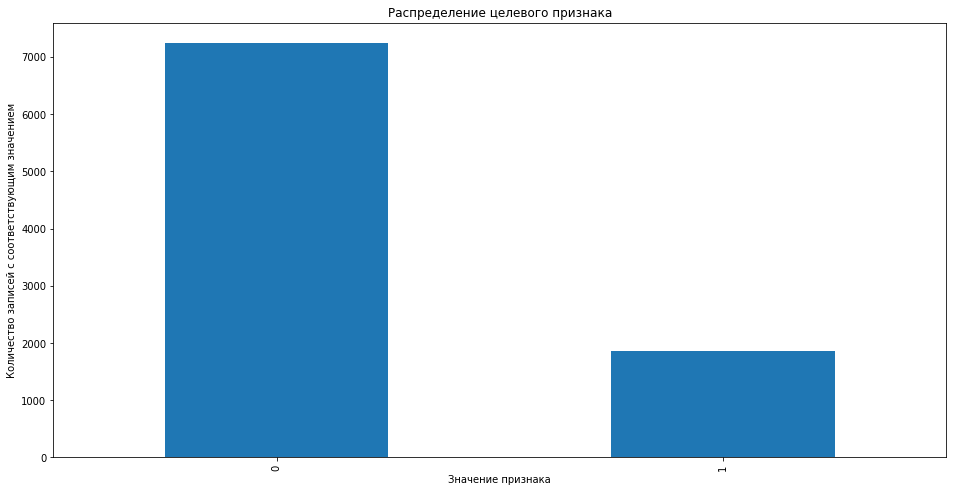

In [16]:
# Посмотрим на распределение значений целевого признака
fig, ax = plt.subplots(1)
ax.set_title('Распределение целевого признака')
ax.set_xlabel('Значение признака')
ax.set_ylabel('Количество записей с соответствующим значением')
target.value_counts().plot(kind='bar', figsize=(16,8), ax=ax)

Очевидно, что имеем существенный перекос в данных в пользу тех, кто еще не прекратил отношения с банком. Для наших моделей это может быть плохо, но пока будем работать с тем, что есть.

In [17]:
# Поскольку мы все равно будем исследовать все метрики, а они имеют одинаковую сигнатуру,
# имеет смысл объеденить вывод в одну функцию, чтобы сразу получать все интересующие данные

def print_full_scrore_info_title():
    print('|{: >9}|{: >9}|{: >9}|{: >9}|{: >7}|{: >7}|{: >7}|{: >7}|'.format('Accuracy', 'Recall', 'Precision', 'F1', 'TP', 'TN', 'FP', 'FN'))

def print_full_score_info(predicted, target):
    
    accuracy = accuracy_score(target, predicted)
    recall = recall_score(target, predicted)
    precision = precision_score(target, predicted)
    f1 = f1_score(target, predicted)
    
    confusion_m = confusion_matrix(target, predicted);
    TN = confusion_m[0][0]
    TP = confusion_m[1][1]
    FN = confusion_m[1][0]
    FP = confusion_m[0][1]
    
    print('|{: >9.7f}|{: >9.7f}|{: >9.7f}|{: >9.7f}|{: >7}|{: >7}|{: >7}|{: >7}|'.format(accuracy, recall, precision, f1, TP, TN, FP, FN))

**Переделал код**

In [18]:
# Изучим модели без учета дисбаланса
# Начнем с дерева решений

# определим глобальный массив, где будем сохранять наши лучшие результаты
best_results = dict()
best_results['decision_tree'] = dict()
best_results['logistic_regression'] = dict()
best_results['random_forest'] = dict()

# напишем функцию по выводу информации по нашей модели
def check_decision_tree(features_train, target_train, class_weight, train_type):
    print('Decision tree')
    print('|{: >9}'.format('max_depth'), end='')
    print_full_scrore_info_title()
    
    # будем сразу считать лучшую меру и параметры, чтобы не искать глазами
    best_f1 = 0
    best_max_depth = 0
    for max_depth in range(2, 11, 1):
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE, class_weight=class_weight)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        print('    Значение AUC-ROC: {:.2f}'.format(auc_roc))
        print('|{: >9}'.format(max_depth), end='')
        print_full_score_info(target_valid, predicted_valid)
        
        current_f1 = f1_score(target_valid, predicted_valid)
        if (current_f1 > best_f1):
            best_f1 = current_f1
            best_max_depth = max_depth
    
    # воспользуемся тем, что питон будет искать наш словарь глобально
    best_results['decision_tree'][train_type] = dict()
    best_results['decision_tree'][train_type]['params'] = 'max_depth=' + str(best_max_depth)
    best_results['decision_tree'][train_type]['f1'] = best_f1


In [19]:
# исследуем дерево решений

check_decision_tree(features_train, target_train, None, 'default')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
    Значение AUC-ROC: 0.76
|        2|0.8305831|0.6236559|0.4615385|0.5304878|    174|   1336|    203|    105|
    Значение AUC-ROC: 0.80
|        3|0.8333333|0.8490566|0.2387268|0.3726708|     90|   1425|    287|     16|
    Значение AUC-ROC: 0.82
|        4|0.8509351|0.7476636|0.4244032|0.5414552|    160|   1387|    217|     54|
    Значение AUC-ROC: 0.85
|        5|0.8575358|0.8782051|0.3633952|0.5140713|    137|   1422|    240|     19|
    Значение AUC-ROC: 0.85
|        6|0.8586359|0.7884615|0.4350133|0.5606838|    164|   1397|    213|     44|
    Значение AUC-ROC: 0.83
|        7|0.8536854|0.7211155|0.4801061|0.5764331|    181|   1371|    196|     70|
    Значение AUC-ROC: 0.81
|        8|0.8443344|0.6958333|0.4429708|0.5413290|    167|   1368|    210|     73|
    Значение AUC-ROC: 0.79
|        9|0.8371837|0.6483516|0.4694960|0.5446154|    177|   1345|    200|     96|
    Значение A

In [20]:
# Посмотрим на регрессию

def check_logistic_regression(features_train, target_train, class_weight, train_type):
    print('Logistic regression')
    print_full_scrore_info_title()
    
    model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight=class_weight)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print_full_score_info(target_valid, predicted_valid)
    
    # воспользуемся тем, что питон будет искать наш словарь глобально
    best_results['logistic_regression'][train_type] = dict()
    best_results['logistic_regression'][train_type]['params'] = '-'
    best_results['logistic_regression'][train_type]['f1'] = f1_score(target_valid, predicted_valid)
    
check_logistic_regression(features_train, target_train, None, 'default')

Logistic regression
| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
|0.8085809|0.6178862|0.2015915|0.3040000|     76|   1394|    301|     47|


In [21]:
# исследуем случайный лес

def check_random_forest(features_train, target_train, class_weight, train_type):
    print('Decision tree')
    print('|{: >12}|{: >9}|'.format('n_estimators', 'max_depth'), end='')
    print_full_scrore_info_title()
    print()
    
    # будем сразу считать лучшую меру и параметры, чтобы не искать глазами
    best_f1 = 0
    best_max_depth = 0
    best_n_estimators = 0
    
    for estim in range(5, 26, 5):
        for max_depth in range(5, 26, 5):
            model = RandomForestClassifier(n_estimators=estim, max_depth=max_depth, random_state=RANDOM_STATE, class_weight=class_weight)
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            predicted_valid = model.predict(features_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
            print('    Значение AUC-ROC: {:.2f}'.format(auc_roc))
            print('|{: >12}|{: >9}|'.format(estim, max_depth), end='')
            print_full_score_info(target_valid, predicted_valid)
            
            f1 = f1_score(target_valid, predicted_valid)
            if (f1 > best_f1):
                best_f1 = f1
                best_max_depth = max_depth
                best_n_estimators = estim
        
        print() # для разделения вывода по количеству деревьев
    
    # воспользуемся тем, что питон будет искать наш словарь глобально
    best_results['random_forest'][train_type] = dict()
    best_results['random_forest'][train_type]['params'] = 'estim=' + str(best_n_estimators) + '; max_depth=' + str(best_max_depth)
    best_results['random_forest'][train_type]['f1'] = best_f1
        
check_random_forest(features_train, target_train, None, 'default')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|

    Значение AUC-ROC: 0.83
|           5|        5||0.8514851|0.7988827|0.3793103|0.5143885|    143|   1405|    234|     36|
    Значение AUC-ROC: 0.83
|           5|       10||0.8509351|0.7264957|0.4509284|0.5564648|    170|   1377|    207|     64|
    Значение AUC-ROC: 0.81
|           5|       15||0.8520352|0.7014925|0.4986737|0.5829457|    188|   1361|    189|     80|
    Значение AUC-ROC: 0.79
|           5|       20||0.8371837|0.6516854|0.4615385|0.5403727|    174|   1348|    203|     93|
    Значение AUC-ROC: 0.79
|           5|       25||0.8278328|0.6081081|0.4774536|0.5349183|    180|   1325|    197|    116|

    Значение AUC-ROC: 0.85
|          10|        5||0.8542354|0.8500000|0.3607427|0.5065177|    136|   1417|    241|     24|
    Значение AUC-ROC: 0.85
|          10|       10||0.8536854|0.7511312|0.4403183|0.5551839|    166|   1386|    211|     55|
    Значени

**Вывод**
1. В текущем виде нам никак не удастся достигнуть F1-меры выше 0,59
2. Все модели неплохо предсказывают негативные исходы, но ошибаются в половине или более случаев при предсказывании положительного исхода 
3. Лучший результат по F1 мере показал случайный лес
4. В целом результат случайного леса сопоставим с деревом решений - имеем относительно высокую точность при полноте ниже среднего
5. Худший результат показала регрессия, результат не был ни точным, ни полным.
6. При этом да, accuracy во всех случаях выглядит очень аппетитно и не нужным

## Борьба с дисбалансом

**Взвешивание классов**

In [22]:
# Для начала проверим чего мы сможем добиться путем простого взвешивания классов
# Начнем с дерева решений

check_decision_tree(features_train, target_train, 'balanced', 'balanced')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
    Значение AUC-ROC: 0.76
|        2|0.7392739|0.4231379|0.7082228|0.5297619|    267|   1077|    110|    364|
    Значение AUC-ROC: 0.79
|        3|0.7667767|0.4582593|0.6843501|0.5489362|    258|   1136|    119|    305|
    Значение AUC-ROC: 0.82
|        4|0.7266227|0.4164345|0.7931034|0.5461187|    299|   1022|     78|    419|
    Значение AUC-ROC: 0.84
|        5|0.7783278|0.4771127|0.7188329|0.5735450|    271|   1144|    106|    297|
    Значение AUC-ROC: 0.83
|        6|0.7447745|0.4364964|0.7931034|0.5630885|    299|   1055|     78|    386|
    Значение AUC-ROC: 0.81
|        7|0.7315732|0.4192140|0.7639257|0.5413534|    288|   1042|     89|    399|
    Значение AUC-ROC: 0.79
|        8|0.7744774|0.4700544|0.6870027|0.5581897|    259|   1149|    118|    292|
    Значение AUC-ROC: 0.76
|        9|0.7508251|0.4296296|0.6153846|0.5059978|    232|   1133|    145|    308|
    Значение A

**Промежуточный вывод**

- Нет просадки на уровне 3, что была до этого
- Лучший F1 получили на 5м уровне (0.5735450) и уже удалось перейти порог
- Мы улучшили F1, модель стала получше искать положительные ответы и нам даже удалось добиться порогового значения

In [23]:
# Посмотрим, как дела с логистической регрессией

check_logistic_regression(features_train, target_train, 'balanced', 'balanced')

Logistic regression
| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
|0.7090209|0.3917379|0.7294430|0.5097312|    275|   1014|    102|    427|


**Промежуточный вывод**

- Ощутимо улучшилась полнота, но также ощутимо упала точность
- F1 по прежнему имеет плохой результат и далеко от целевого признака

In [24]:
# Смотрим, как дела обстоят со случайным лесом

check_random_forest(features_train, target_train, 'balanced', 'balanced')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|

    Значение AUC-ROC: 0.85
|           5|        5||0.7832783|0.4852174|0.7400531|0.5861345|    279|   1145|     98|    296|
    Значение AUC-ROC: 0.84
|           5|       10||0.8151815|0.5446623|0.6631300|0.5980861|    250|   1232|    127|    209|
    Значение AUC-ROC: 0.82
|           5|       15||0.8421342|0.6323529|0.5702918|0.5997211|    215|   1316|    162|    125|
    Значение AUC-ROC: 0.80
|           5|       20||0.8492849|0.6973180|0.4827586|0.5705329|    182|   1362|    195|     79|
    Значение AUC-ROC: 0.81
|           5|       25||0.8498350|0.6984733|0.4854111|0.5727700|    183|   1362|    194|     79|

    Значение AUC-ROC: 0.85
|          10|        5||0.7893289|0.4945455|0.7214854|0.5868393|    272|   1163|    105|    278|
    Значение AUC-ROC: 0.85
|          10|       10||0.8184818|0.5569007|0.6100796|0.5822785|    230|   1258|    147|    183|
    Значени

**Промежуточный вывод по взвешиванию классов**
1. Имеем хорошую точность, но посредственную полноту (за редким исключением)
2. Также добились нужного значения F1 меры, при чем, как в дереве решений, так и в случайном лесе. Случайный лес победил
2. Что интересно, увеличение глубины деревьев повышает точность, но снижает полноту
3. В целом сравнительный результат моделей с взвешиванием и без него неизменился - логистическая регрессия также на последнем месте, дерево решений показывает относительно неплохой, но недостаточный результат.

**Upsampling**

In [25]:
# Не будем останавливаться на достигнутом, попробуем увелечение выборки

# поскольку модели лучше учатся при соотношении 50 на 50, для начала вычислим коэффицент
# насколько больше у нас отрицательных значений

coef = target[target == 1].count() / target[target == 0].count()
coef

0.2561835014508774

In [26]:
# напишем функцию, которая будет увеличивать нашу выборку с учетом коэффицента

def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    repeat = repeat
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(8832, 11)
(8832,)


In [27]:
# Проверим, что выборки поменялись
target_upsampled.value_counts()

1    4504
0    4328
Name: Exited, dtype: int64

In [28]:
# Проверим, что стало с деревом решений

check_decision_tree(features_upsampled, target_upsampled, None, 'upsample')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
    Значение AUC-ROC: 0.76
|        2|0.7392739|0.4231379|0.7082228|0.5297619|    267|   1077|    110|    364|
    Значение AUC-ROC: 0.79
|        3|0.7667767|0.4582593|0.6843501|0.5489362|    258|   1136|    119|    305|
    Значение AUC-ROC: 0.82
|        4|0.7266227|0.4164345|0.7931034|0.5461187|    299|   1022|     78|    419|
    Значение AUC-ROC: 0.84
|        5|0.7783278|0.4771127|0.7188329|0.5735450|    271|   1144|    106|    297|
    Значение AUC-ROC: 0.83
|        6|0.7447745|0.4364964|0.7931034|0.5630885|    299|   1055|     78|    386|
    Значение AUC-ROC: 0.81
|        7|0.7315732|0.4192140|0.7639257|0.5413534|    288|   1042|     89|    399|
    Значение AUC-ROC: 0.79
|        8|0.7700770|0.4639719|0.7002653|0.5581395|    264|   1136|    113|    305|
    Значение AUC-ROC: 0.77
|        9|0.7574257|0.4400749|0.6233422|0.5159166|    235|   1142|    142|    299|
    Значение A

In [29]:
# Проверим логистическую регрессию
check_logistic_regression(features_upsampled, target_upsampled, None, 'upsample')

Logistic regression
| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
|0.7013201|0.3859890|0.7453581|0.5085973|    281|    994|     96|    447|


*Удивительно, но мы получили почти те же результаты в двух случаях, что и при использовании class_weight='balanced'*

In [30]:
# Проверим случайный лес

check_random_forest(features_upsampled, target_upsampled, None, 'upsample')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|

    Значение AUC-ROC: 0.84
|           5|        5||0.7645765|0.4585366|0.7480106|0.5685484|    282|   1108|     95|    333|
    Значение AUC-ROC: 0.83
|           5|       10||0.8047305|0.5237069|0.6445623|0.5778835|    243|   1220|    134|    221|
    Значение AUC-ROC: 0.80
|           5|       15||0.8184818|0.5630027|0.5570292|0.5600000|    210|   1278|    167|    163|
    Значение AUC-ROC: 0.79
|           5|       20||0.8272827|0.5877437|0.5596817|0.5733696|    211|   1293|    166|    148|
    Значение AUC-ROC: 0.79
|           5|       25||0.8223322|0.5737705|0.5570292|0.5652759|    210|   1285|    167|    156|

    Значение AUC-ROC: 0.85
|          10|        5||0.7942794|0.5026178|0.7639257|0.6063158|    288|   1156|     89|    285|
    Значение AUC-ROC: 0.85
|          10|       10||0.8140814|0.5421166|0.6657825|0.5976190|    251|   1229|    126|    212|
    Значени

А вот для случайного леса результат удалось неплохо улучшить

**Промежуточный вывод**

Применение апсемплинга не сказалось существенно на результате работы Дерева решений и логистической регресии.
А вот для случайного леса эффект можно считать ощутимым - на этот раз снизилась точность, но мы имеем весьма неплохое значение полноты.
При чем, если исходить из задачи - полнота для нас является более важным признаком.

**Downsampling**

In [31]:
# Попробуем уменьшение выборки

def downsample(features, target, coef):
    fraction = coef;
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, coef)

# проверим, что выборки примерно совпадают
target_downsampled.value_counts()

1    1126
0    1109
Name: Exited, dtype: int64

In [32]:
# Проверим решающее дерево

check_decision_tree(features_downsampled, target_downsampled, None, 'downsample')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
    Значение AUC-ROC: 0.76
|        2|0.7392739|0.4231379|0.7082228|0.5297619|    267|   1077|    110|    364|
    Значение AUC-ROC: 0.80
|        3|0.7667767|0.4582593|0.6843501|0.5489362|    258|   1136|    119|    305|
    Значение AUC-ROC: 0.82
|        4|0.7585259|0.4486755|0.7188329|0.5524975|    271|   1108|    106|    333|
    Значение AUC-ROC: 0.83
|        5|0.7601760|0.4541213|0.7745358|0.5725490|    292|   1090|     85|    351|
    Значение AUC-ROC: 0.82
|        6|0.7546755|0.4479638|0.7877984|0.5711538|    297|   1075|     80|    366|
    Значение AUC-ROC: 0.81
|        7|0.7348735|0.4224520|0.7586207|0.5426945|    286|   1050|     91|    391|
    Значение AUC-ROC: 0.79
|        8|0.7244224|0.4106628|0.7559682|0.5322129|    285|   1032|     92|    409|
    Значение AUC-ROC: 0.77
|        9|0.7238724|0.4084919|0.7400531|0.5264151|    279|   1037|     98|    404|
    Значение A

In [33]:
# Проверим линейную регрессию

check_logistic_regression(features_downsampled, target_downsampled, None, 'downsample')

Logistic regression
| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
|0.6991199|0.3829201|0.7374005|0.5040798|    278|    993|     99|    448|


- Логистическая регрессия по прежнему показывает худший результат

In [34]:
# Проверим случайный лес

check_random_forest(features_downsampled, target_downsampled, None, 'downsample')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|

    Значение AUC-ROC: 0.84
|           5|        5||0.7750275|0.4736842|0.7639257|0.5847716|    288|   1121|     89|    320|
    Значение AUC-ROC: 0.81
|           5|       10||0.7524752|0.4427002|0.7480106|0.5562130|    282|   1086|     95|    355|
    Значение AUC-ROC: 0.81
|           5|       15||0.7491749|0.4381847|0.7427056|0.5511811|    280|   1082|     97|    359|
    Значение AUC-ROC: 0.80
|           5|       20||0.7387239|0.4243827|0.7294430|0.5365854|    275|   1068|    102|    373|
    Значение AUC-ROC: 0.80
|           5|       25||0.7398240|0.4256966|0.7294430|0.5376344|    275|   1070|    102|    371|

    Значение AUC-ROC: 0.86
|          10|        5||0.7876788|0.4924115|0.7745358|0.6020619|    292|   1140|     85|    301|
    Значение AUC-ROC: 0.83
|          10|       10||0.7546755|0.4465116|0.7639257|0.5636008|    288|   1084|     89|    357|
    Значени

Для случайного леса upsampling оказался гораздо лучше, хотя в рамках самой группы (среди всех моделей где применялся downsample), случайный лес по прежнему лидирует

**Промежуточный вывод**

Можно было бы много написать, но результат однозначен. Результаты downsampling'а и upsampling'a вполне сопоставимы, но upsampling показал лучшие результаты.
Хотя именно для дерева решений downsample оказал лучшее влияние

**Upsampling + Downsampling**

Не сдадимся и попробуем применить комбинированную модель, смысл которой будет в том, чтобы уменьшить в два раза количество нулевых значений и увеличить в два раза количество положительных значений.
Для наших данных подходит именно эта пропорция, т.к. это эксперимент, писать общую функцию через коэффиценты пока не будем.

In [35]:
# напишем функцию, которая увеличит положительную выборку и уменьшит отрицательную, как нам нужно

def upsample_and_downsample_combine(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    repeat = round(1 / coef)
    features_combined = pd.concat([features_zeros.sample(frac=0.5, random_state=RANDOM_STATE)] + [features_ones] * 2)
    target_combined = pd.concat([target_zeros.sample(frac=0.5, random_state=RANDOM_STATE)] + [target_ones] * 2)
    
    features_combined, target_combined = shuffle(features_combined, target_combined, random_state=RANDOM_STATE)
    
    return features_combined, target_combined

features_combined, target_combined = upsample_and_downsample_combine(features_train, target_train)

# проверим, что данные сопоставимы
target_combined.value_counts()

1    2252
0    2164
Name: Exited, dtype: int64

In [36]:
# проверим дерево решений
check_decision_tree(features_combined, target_combined, None, 'combined')

Decision tree
|max_depth| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
    Значение AUC-ROC: 0.76
|        2|0.7392739|0.4231379|0.7082228|0.5297619|    267|   1077|    110|    364|
    Значение AUC-ROC: 0.80
|        3|0.7387239|0.4222222|0.7055703|0.5283019|    266|   1077|    111|    364|
    Значение AUC-ROC: 0.82
|        4|0.7574257|0.4496855|0.7586207|0.5646594|    286|   1091|     91|    350|
    Значение AUC-ROC: 0.83
|        5|0.7337734|0.4262069|0.8196286|0.5607985|    309|   1025|     68|    416|
    Значение AUC-ROC: 0.83
|        6|0.7376238|0.4289773|0.8010610|0.5587419|    302|   1039|     75|    402|
    Значение AUC-ROC: 0.81
|        7|0.7150715|0.4043419|0.7904509|0.5350090|    298|   1002|     79|    439|
    Значение AUC-ROC: 0.78
|        8|0.7392739|0.4252696|0.7320955|0.5380117|    276|   1068|    101|    373|
    Значение AUC-ROC: 0.75
|        9|0.7326733|0.4108020|0.6657825|0.5080972|    251|   1081|    126|    360|
    Значение A

In [37]:
# Проверим логистическую регрессию
check_logistic_regression(features_combined, target_combined, None, 'combined')

Logistic regression
| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
|0.6963696|0.3812754|0.7453581|0.5044883|    281|    985|     96|    456|


In [38]:
# Проверим случайный лес
check_random_forest(features_combined, target_combined, None, 'combined')

Decision tree
|n_estimators|max_depth|| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|

    Значение AUC-ROC: 0.84
|           5|        5||0.7717272|0.4692557|0.7692308|0.5829146|    290|   1113|     87|    328|
    Значение AUC-ROC: 0.83
|           5|       10||0.7651265|0.4568966|0.7029178|0.5538140|    265|   1126|    112|    315|
    Значение AUC-ROC: 0.80
|           5|       15||0.7728273|0.4672727|0.6816976|0.5544768|    257|   1148|    120|    293|
    Значение AUC-ROC: 0.82
|           5|       20||0.7810781|0.4801512|0.6737401|0.5607064|    254|   1166|    123|    275|
    Значение AUC-ROC: 0.80
|           5|       25||0.7678768|0.4582560|0.6551724|0.5393013|    247|   1149|    130|    292|

    Значение AUC-ROC: 0.86
|          10|        5||0.7827283|0.4847973|0.7612732|0.5923633|    287|   1136|     90|    305|
    Значение AUC-ROC: 0.85
|          10|       10||0.7893289|0.4946237|0.7320955|0.5903743|    276|   1159|    101|    282|
    Значени

**Промежуточный вывод**

- Топ моделей по прежнему не меняется
- Комбинированный вариант внезапно лучше отразился на логистической регрессии
- Для дерева решений результат оказался чуть хуже как upsampling'a, так и downsampling'a
- А вот случайный лес показал неплохой результат, но до upsample не дотянул

**Примечание**

Изменение порога классификации мы исследовать не будем, т.к. сама по себе F1 мера, к которой мы стремимся, подразумевает сбалансированное значение Recall + Precision. Однако мы помним, что в рамках нашей задачи лучше определить как можно больше потенциальных уходов, чтобы можно было их обработать. Поэтому на итоговой модели мы попробуем немного изменить значение

In [39]:
# подведем итоги по полученным результатам

print('|{: >20}|{: >15}|{: >25}|{: >10}|'.format('Model name', 'Train type', 'Params', 'F1'))
for model_name in best_results:
    print()
    for train_type in best_results[model_name]:
        print('|{: >20}|{: >15}|{: >25}|{: >10.5f}|'.format(
            model_name, train_type, 
            best_results[model_name][train_type]['params'], best_results[model_name][train_type]['f1']))

|          Model name|     Train type|                   Params|        F1|

|       decision_tree|        default|              max_depth=7|   0.57643|
|       decision_tree|       balanced|              max_depth=5|   0.57354|
|       decision_tree|       upsample|              max_depth=5|   0.57354|
|       decision_tree|     downsample|              max_depth=5|   0.57255|
|       decision_tree|       combined|              max_depth=4|   0.56466|

| logistic_regression|        default|                        -|   0.30400|
| logistic_regression|       balanced|                        -|   0.50973|
| logistic_regression|       upsample|                        -|   0.50860|
| logistic_regression|     downsample|                        -|   0.50408|
| logistic_regression|       combined|                        -|   0.50449|

|       random_forest|        default|   estim=25; max_depth=20|   0.60225|
|       random_forest|       balanced|   estim=15; max_depth=10|   0.61799|
|       r

**Вывод**

Мы попробовали разные подходы для решения проблемы дисбаланса и получили весьма любопытные результаты

1. Лучший результат среди всех моделей во всех случаях показывает случайный лес
2. Лучше всего на случайный лес влияют upsample и взвешивание классов
3. На логистическую регрессию также оказал наибольшее влияние именно комбинированный подход
4. Сама по себе логистическая регрессия по всех тестах показала худший результат
5. А вот дерево решений показало завидное постоянство - при плюс-минус одинаковой глубине результат всегда был примерно одинаковым для всех ситуаций.

Лучшей моделью в нашем случае оказался случайный лес с взвешиванием классов, его и будем тестировать

## Тестирование модели

In [40]:
model = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print_full_scrore_info_title()
print_full_score_info(target_test, predicted_test)

| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
|0.8422210|0.5855615|0.6239316|0.6041379|    219|   1313|    132|    155|


In [41]:
# Хоть мы и добились неплохой полноты при хорошей точности, попробуем немного подкрутить полноту
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0.1, 0.5, 0.05):
    predicted_test = probabilities_one_test > threshold
    precision = precision_score(target_test, predicted_test)
    recall = recall_score(target_test, predicted_test)
    
    print(str(round(threshold,2)) + ' - ' + str(f1_score(target_test, predicted_test)) + ' - ' + str(recall_score(target_test, predicted_test)))

0.1 - 0.3894917190177042 - 0.9715099715099715
0.15 - 0.4269230769230769 - 0.9487179487179487
0.2 - 0.46086956521739125 - 0.905982905982906
0.25 - 0.4926590538336052 - 0.8603988603988604
0.3 - 0.5290909090909092 - 0.8290598290598291
0.35 - 0.5482546201232033 - 0.7606837606837606
0.4 - 0.572737686139748 - 0.7122507122507122
0.45 - 0.5892634207240949 - 0.6723646723646723


In [42]:
# Посмотрим на параметры при пороге классификации 0.4
predicted_test = probabilities_one_test > 0.4
print_full_scrore_info_title()
print_full_score_info(target_test, predicted_test)

| Accuracy|   Recall|Precision|       F1|     TP|     TN|     FP|     FN|
|0.7949423|0.4789272|0.7122507|0.5727377|    250|   1196|    101|    272|


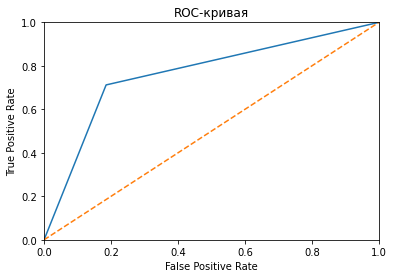

In [43]:
# Посмотрим на ROC кривую

fpr, tpr, thresholds = roc_curve(target_test, predicted_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Общий вывод**

1. Мы исследовали наши данные, отбросили лишние признаки и заполнили пропуски
2. Также были обработаны категориальные признаки и стандартизированы числовые
3. Мы исследовали различные модели на имеющемся наборе и столкнулись с проблемой дисбаланса, которая не позволила нам добиться необходимой полноты и точности
4. Для решения проблемы мы попробовали
    - Выровнять вес классов
    - Добавить данных положительного класса
    - Убрать данные отрицательного класса
    - Применить комбинированный подход
5. На основании нашего исследования мы выбрали и обучили лучшую модель. Это оказался случайный лес с количеством деревьев 20 и глубиной 10.
6. Нам удалось достичь необходимой F1-меры
7. Однако, дополнительно исследовав модель и изменив порог классификации, нам удалось добиться еще более впечатляющих результатов за счет увеличения полноты ценой снижения точности.

Однако, мы помним, что нашей изначальной целью было именно своевременное прогнозирование оттока клиента и для данной задачи важна именно полнота, чтобы банк имел возможность предотвратить уход клиента, чтобы сэкономить деньги.

В итоге, наша модель полностью отвечает как формальным, так и бизнес-требованиям.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [х ]  Весь код выполняется без ошибок
- [х ]  Ячейки с кодом расположены в порядке исполнения
- [ х]  Выполнен шаг 1: данные подготовлены
- [х ]  Выполнен шаг 2: задача исследована
    - [ х]  Исследован баланс классов
    - [х ]  Изучены модели без учёта дисбаланса
    - [х ]  Написаны выводы по результатам исследования
- [ х]  Выполнен шаг 3: учтён дисбаланс
    - [х ]  Применено несколько способов борьбы с дисбалансом
    - [х ]  Написаны выводы по результатам исследования
- [х ]  Выполнен шаг 4: проведено тестирование
- [ х]  Удалось достичь *F1*-меры не менее 0.59
- [х ]  Исследована метрика *AUC-ROC*